In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [ ]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

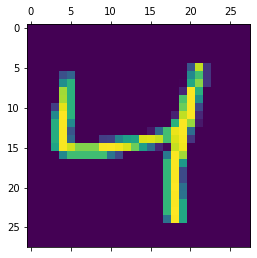

In [ ]:
plt.matshow(X_train[2])

In [ ]:
y_train[2]

4

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train_falttened=X_train.reshape(len(X_train), 28*28)
X_test_falttened=X_test.reshape(len(X_test), 28*28)

In [ ]:
X_train_falttened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_falttened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7187 - accuracy: 0.8157
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3086 - accuracy: 0.9141
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2813 - accuracy: 0.9220
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2779 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2713 - accuracy: 0.9257


In [ ]:
model.evaluate(X_test_falttened,y_test)

313/313 [==============================] - 0s 953us/step - loss: 0.2665 - accuracy: 0.9259


[0.26646506786346436, 0.9258999824523926]

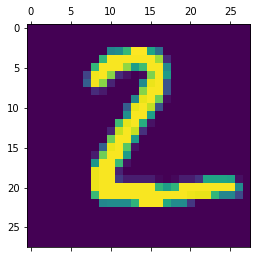

In [ ]:
plt.matshow(X_test[1])

In [ ]:
y_predicted=model.predict(X_test_falttened)
y_predicted[1]

array([4.3326843e-01, 4.8804283e-03, 9.9967289e-01, 2.9356396e-01,
       2.6118652e-10, 7.6401794e-01, 8.3615392e-01, 1.1173115e-12,
       1.2495929e-01, 3.5962693e-09], dtype=float32)

In [ ]:
np.argmax(y_predicted[1])

2

In [ ]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    2,    2,    0,    4,    5,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    7,  943,   11,    6,    2,   11,    9,   33,    6],
       [   4,    0,   27,  913,    0,   23,    3,   11,   23,    6],
       [   1,    1,   10,    1,  892,    0,   10,    4,   10,   53],
       [  11,    3,    7,   30,    7,  769,   17,    6,   34,    8],
       [  11,    3,   11,    1,    7,    6,  914,    2,    3,    0],
       [   1,    5,   26,    4,    3,    0,    0,  951,    2,   36],
       [   8,    9,    9,   17,    9,   22,   10,   11,  870,    9],
       [  10,    7,    2,   11,   16,    5,    0,   21,    7,  930]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

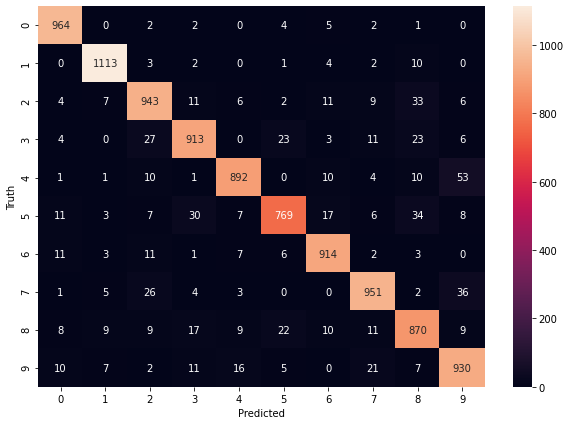

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_falttened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4559 - accuracy: 0.8713
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1276 - accuracy: 0.9628
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0912 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0688 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0521 - accuracy: 0.9845


In [ ]:
model.evaluate(X_test_falttened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9741


[0.080692820250988, 0.9740999937057495]

Text(69.0, 0.5, 'Truth')

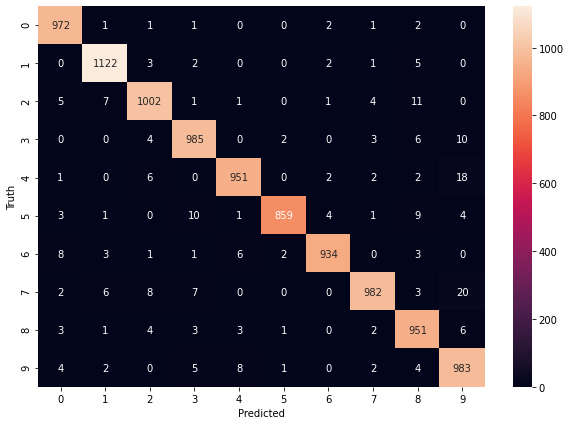

In [ ]:
y_predicted=model.predict(X_test_falttened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4484 - accuracy: 0.8732
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1354 - accuracy: 0.9605
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0904 - accuracy: 0.9726
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0676 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9842


In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0795 - accuracy: 0.9758


[0.07945682853460312, 0.9757999777793884]